<a href="https://colab.research.google.com/github/khushibaid/Credit-Card-prediction/blob/main/ML_Project_CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT CARD APPROVAL PREDICTION

**We have used multiple classification technqiues along with a final ensemble model having accuracy of 84.78%**

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

## Loading Dataset

In [ ]:
credit = pd.read_csv('/content/creditcard_approval.csv')

## Exploring the dataset

In [ ]:
credit.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [ ]:
credit.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [ ]:
credit.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [ ]:
credit.dtypes

,0
Gender,int64
Age,float64
Debt,float64
Married,int64
BankCustomer,int64
Industry,object
Ethnicity,object
YearsEmployed,float64
PriorDefault,int64
Employed,int64


In [ ]:
credit.isnull().sum()

,0
Gender,0
Age,0
Debt,0
Married,0
BankCustomer,0
Industry,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0
Employed,0


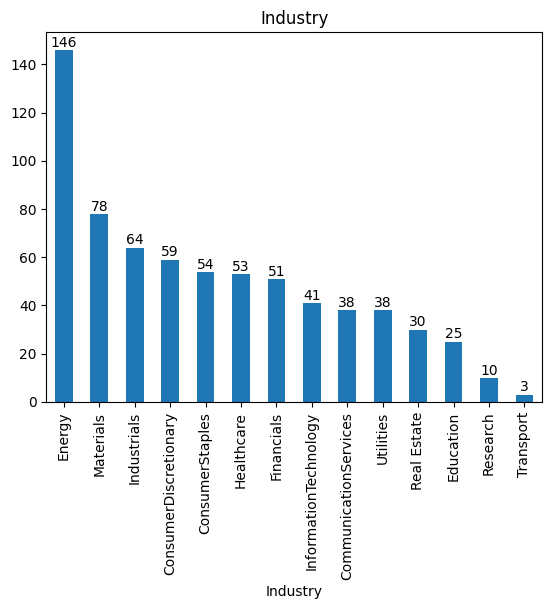

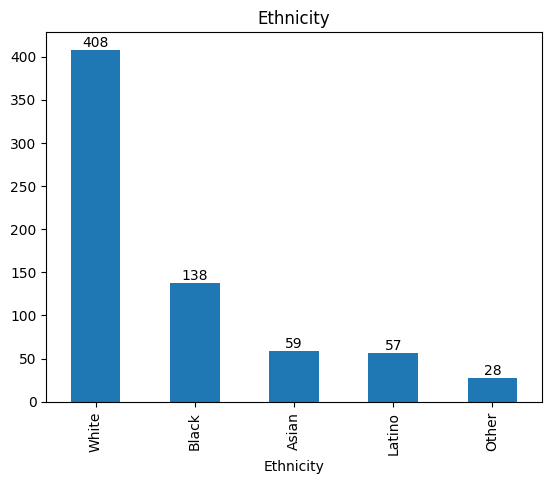

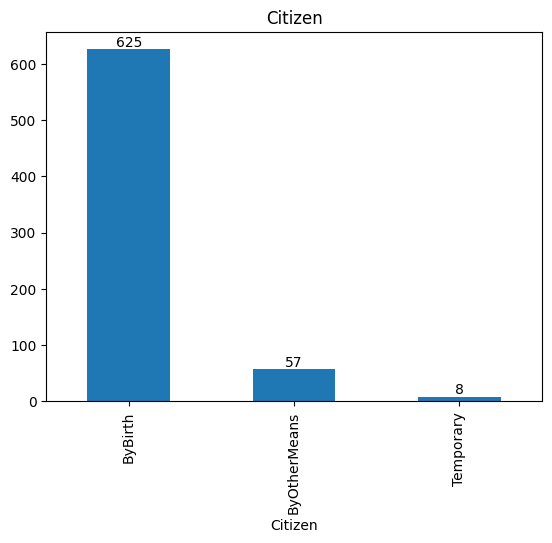

In [ ]:
# display all columns have a datatype "object"
def display_object(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            value_counts = df[column].value_counts()
            ax = value_counts.plot(kind='bar', title=column)
            for i, v in enumerate(value_counts):
                ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
            plt.show()

display_object(credit)

## Data Pre-processing

In [ ]:
# credit['Industry'].replace(['Energy', 'Materials','Industrials','ConsumerDiscretionary','ConsumerStaples','Healthcare','Financials', 'InformationTechnology','CommunicationServices','Utilities','Real Estate','Education','Research','Transport'],
                        # [0, 1,2,3,4,5,6,7,8,8,8,8,8,8], inplace=True)

In [ ]:
#from matplotlib import pyplot as plt
#credit['Industry'].plot(kind='hist', bins=20, title='Industry')
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
credit

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [ ]:
ethnicity=pd.get_dummies(credit['Ethnicity'])
credit=pd.concat([credit,ethnicity],axis=1)
credit.drop(['Ethnicity'],axis=1,inplace=True)

industry=pd.get_dummies(credit['Industry'])
credit=pd.concat([credit,industry],axis=1)
credit.drop(['Industry'],axis=1,inplace=True)

citizen=pd.get_dummies(credit['Citizen'])
credit=pd.concat([credit,citizen],axis=1)
credit.drop(['Citizen'],axis=1,inplace=True)



In [ ]:
credit = credit.astype(int)
credit

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Industrials,InformationTechnology,Materials,Real Estate,Research,Transport,Utilities,ByBirth,ByOtherMeans,Temporary
0,1,30,0,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0,58,4,1,1,3,1,1,6,0,...,0,0,1,0,0,0,0,1,0,0
2,0,24,0,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,27,1,1,1,3,1,1,5,1,...,1,0,0,0,0,0,0,1,0,0
4,1,20,5,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21,10,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
686,0,22,0,1,1,2,0,1,2,1,...,0,0,0,0,0,0,0,1,0,0
687,0,25,13,0,0,2,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
688,1,17,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
credit.shape

(690, 35)

In [ ]:
credit.nunique()

,0
Gender,2
Age,350
Debt,215
Married,2
BankCustomer,2
YearsEmployed,132
PriorDefault,2
Employed,2
CreditScore,23
DriversLicense,2


In [ ]:
target_column = 'Approved'
X = credit.drop(columns=[target_column])
y = credit[target_column]

In [ ]:
X=X.drop('ZipCode',axis=1)

In [ ]:
print(X.head())

   Gender    Age   Debt  Married  BankCustomer  YearsEmployed  PriorDefault  \
0       1  30.83  0.000        1             1           1.25             1   
1       0  58.67  4.460        1             1           3.04             1   
2       0  24.50  0.500        1             1           1.50             1   
3       1  27.83  1.540        1             1           3.75             1   
4       1  20.17  5.625        1             1           1.71             1   

   Employed  CreditScore  DriversLicense  ...  Industrials  \
0         1            1               0  ...         True   
1         1            6               0  ...        False   
2         0            0               0  ...        False   
3         1            5               1  ...         True   
4         0            0               0  ...         True   

   InformationTechnology  Materials  Real Estate  Research  Transport  \
0                  False      False        False     False      False   
1     

In [ ]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: Approved, dtype: int64


## Train Test Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_entropy.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of test dataset Decision Tree classifier:", accuracy_dt)

Accuracy of test dataset Decision Tree classifier: 0.6884057971014492


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# 2. Gradient Boosting

In [ ]:
# Initialize and train the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gb = gb_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of test dataset gradient boosting classifier:", accuracy_gb)

Accuracy of test dataset gradient boosting classifier: 0.8333333333333334


## 3. Logistic Regression

In [ ]:
# Fit a logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)
y_train_pred = logreg.predict(X_train_scaled)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

accuracy_test_lr = accuracy_score(y_test, y_pred)
conf_matrix_test = confusion_matrix(y_test, y_pred)

print("Accuracy of test dataset logistic regression classifier:", accuracy_test_lr)

print("Confusion Matrix:")
print(conf_matrix_test)

Accuracy of test dataset logistic regression classifier: 0.8333333333333334
Confusion Matrix:
[[55 13]
 [10 60]]


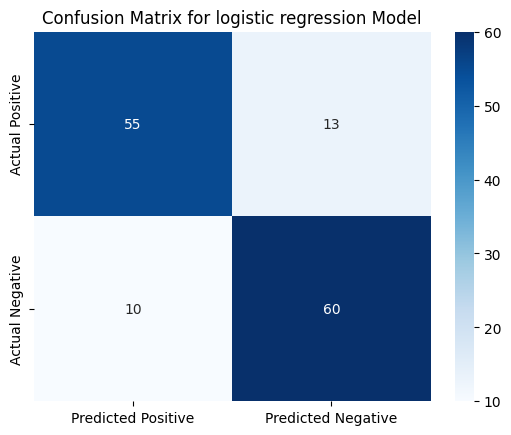

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Your confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert to DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

# Plot the heatmap
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for logistic regression Model')
plt.show()

## 4. Random Forest

In [ ]:
# Instantiate Random Forest classifier
random_f = RandomForestClassifier(random_state=42)

random_f.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = random_f.predict(X_test_scaled)

print("Accuracy of test dataset Random forest classifier:",random_f.score(X_test_scaled,y_test))

# Evaluate the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)


Accuracy of test dataset Random forest classifier: 0.855072463768116
Confusion Matrix for Random Forest:
[[59  9]
 [11 59]]


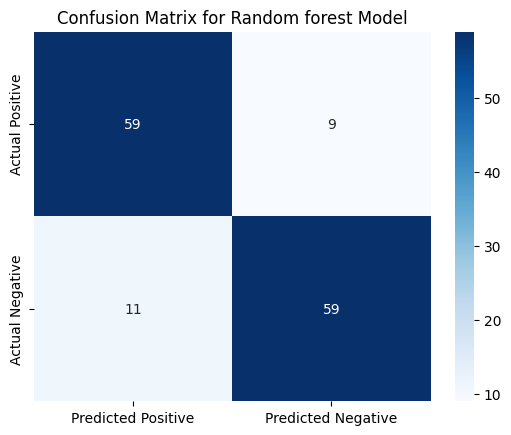

In [ ]:
# Your confusion matrix
conf_matrix = conf_matrix_rf

conf_df = pd.DataFrame(conf_matrix_rf, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for Random forest Model')
plt.show()

5. SVM

In [ ]:
from sklearn.svm import SVC  # Import SVC from sklearn.svm module

# Initialize and train the Support Vector Classifier (SVC)
svm_clf = SVC(kernel='rbf', C=1.0, random_state=42)  # You can adjust parameters like kernel and C value as needed
svm_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of test dataset SVM classifier:", accuracy_svm)



Accuracy of test dataset SVM classifier: 0.8333333333333334


# Table comparing all models

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
import pandas as pd

# Calculate metrics for each model
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1_score = fbeta_score(y_test, y_pred, beta=1)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1_score = fbeta_score(y_test, y_pred_rf, beta=1)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1_score = fbeta_score(y_test, y_pred_gb, beta=1)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1_score = fbeta_score(y_test, y_pred_dt, beta=1)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1_score = fbeta_score(y_test, y_pred_svm, beta=1)

# Create a DataFrame to store the results
data = {  'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'DecisionTree': [dt_accuracy, dt_precision, dt_recall, dt_f1_score],
     'GradientBoosting': [gb_accuracy, gb_precision, gb_recall, gb_f1_score],
   'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1_score],
      'LogisticRegression': [lr_accuracy, lr_precision, lr_recall, lr_f1_score],
    'RandomForest': [rf_accuracy, rf_precision, rf_recall, rf_f1_score]

}

df_metrics = pd.DataFrame(data)

# Print the DataFrame in tabular form
print(df_metrics)



      Metric  DecisionTree  GradientBoosting       SVM  LogisticRegression  \
0   Accuracy      0.688406          0.833333  0.833333            0.833333   
1  Precision      0.639175          0.830986  0.830986            0.821918   
2     Recall      0.885714          0.842857  0.842857            0.857143   
3   F1-Score      0.742515          0.836879  0.836879            0.839161   

   RandomForest  
0      0.855072  
1      0.867647  
2      0.842857  
3      0.855072  


In [ ]:
# new_tuple = [[1,36,3.56,0,1,7,0,2,0,1,8,1,0,888]]

# # Make predictions on the new tuple
# predicted_class = random_f.predict(new_tuple)

# # Display the predicted class
# print("Predicted class for the new tuple:", predicted_class)

In [ ]:
new_tuple2 = [[1,25,120,1,1,0,0,0.25,1,0,0,1,1,0]]

# Make predictions on the new tuple
predicted_class = random_f.predict(new_tuple2)

# Display the predicted class
print("Predicted class for the new tuple:", predicted_class)

Top 5 features: ['PriorDefault', 'CreditScore', 'Income', 'YearsEmployed', 'Debt']


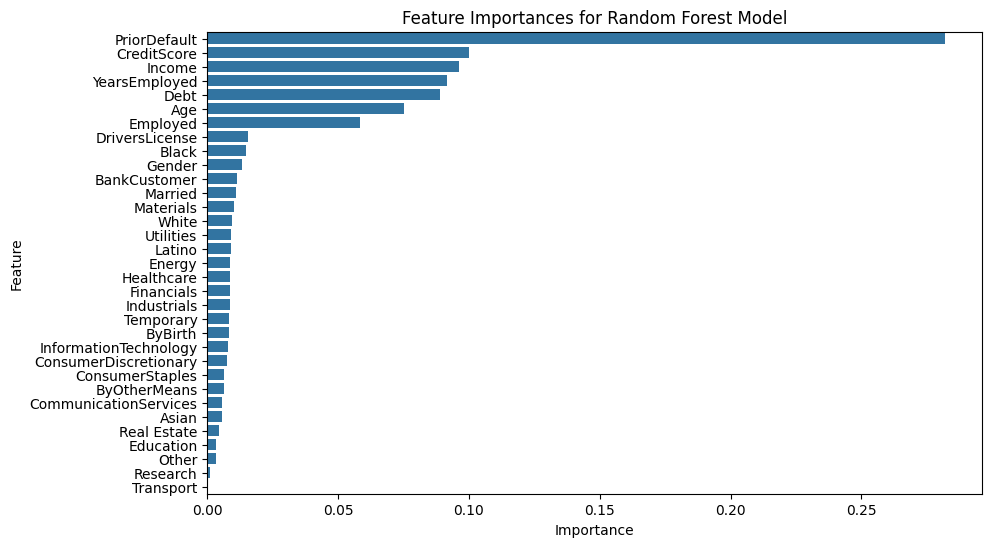

In [ ]:

importances = random_f.feature_importances_
features = X.columns

# Create a DataFrame to store the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the top 5 most important features
print(f"Top 5 features: {list(feature_importances_df['Feature'])[:5]}")

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances for Random Forest Model')
plt.show()


FUTURE SCOPE

Title: Credit Card Approval Prediction using Classification Algorithms, 2022

Publisher:  International Journal for Research in Applied Science and Engineering Technology (IJRASET)
Publication Name:  International Journal for Research in Applied Science and Engineering Technology


To further improve our system, we can use deep learning models as it can increase our accuracy. Neural networks can be used as it
can discover hidden patterns and correlations in raw data, cluster and classify it, and continuously learn and improve over time. In
the future, this credit card approval system will be able to be optimized and implemented in an artificial intelligence environment.
By displaying the prediction result on a web or desktop application, the system can also be automated. Thus, this work has a good
future scope and can be enhanced by adding other various feature for better predictions.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss_sequential, accuracy_sequential = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss_sequential}')
print("Accuracy of test dataset gradient boosting classifier:", accuracy_sequential)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4511 - loss: 0.7284 - val_accuracy: 0.7387 - val_loss: 0.6619
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8107 - loss: 0.6483 - val_accuracy: 0.8378 - val_loss: 0.6146
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8472 - loss: 0.5912 - val_accuracy: 0.8378 - val_loss: 0.5553
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8631 - loss: 0.5274 - val_accuracy: 0.8378 - val_loss: 0.4814
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8693 - loss: 0.4476 - val_accuracy: 0.8468 - val_loss: 0.4195
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8702 - loss: 0.3978 - val_accuracy: 0.8559 - val_loss: 0.3691
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8994 - loss: 0.3370 - val_accuracy: 0.8559 - val_loss: 0.3459
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8932 - loss: 0.3235 - val_accuracy: 0.8649 - val_loss: 0.3329
Ep

Neural Network Model Definition: This section defines the architecture of the neural network model using Sequential() from keras.models.

Dense() layers define fully connected layers in the neural network.

The first layer (Dense(64, activation='relu', input_dim=X_train.shape[1])) has 64 neurons, uses the ReLU activation function, and specifies the input dimension based on the number of features in the training data.

The second layer (Dense(32, activation='relu')) has 32 neurons and uses the ReLU activation function.

The output layer (Dense(1, activation='sigmoid')) has 1 neuron (as it's a binary classification task), and the sigmoid activation function is used to obtain probabilities of the positive class.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Perform feature engineering if possible

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers for each algorithm with hyperparameter tuning
nn_clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
lr_clf = LogisticRegression(C=0.1, random_state=42)

# Hyperparameter tuning for MLPClassifier
param_grid_nn = {'hidden_layer_sizes': [(100, 50), (128, 64)], 'alpha': [0.0001, 0.001]}
grid_search_nn = GridSearchCV(nn_clf, param_grid_nn, cv=3)
grid_search_nn.fit(X_train_scaled, y_train)
best_nn_clf = grid_search_nn.best_estimator_

# Hyperparameter tuning for RandomForestClassifier
param_grid_rf = {'n_estimators': [200, 300], 'max_depth': [10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=3)
grid_search_rf.fit(X_train_scaled, y_train)
best_rf_clf = grid_search_rf.best_estimator_

# Hyperparameter tuning for LogisticRegression
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
grid_search_lr = GridSearchCV(lr_clf, param_grid_lr, cv=3)
grid_search_lr.fit(X_train_scaled, y_train)
best_lr_clf = grid_search_lr.best_estimator_

# Initialize VotingClassifier with soft voting
new_voting_clf = VotingClassifier(estimators=[
    ('nn', best_nn_clf),
    ('rf', best_rf_clf),
    ('lr', best_lr_clf)
], voting='soft')

# Train the new ensemble model
new_voting_clf.fit(X_train_scaled, y_train)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Make predictions
y_pred_new_ensemble = new_voting_clf.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_new_ensemble = accuracy_score(y_test, y_pred_new_ensemble)
precision_new_ensemble = precision_score(y_test, y_pred_new_ensemble)
recall_new_ensemble = recall_score(y_test, y_pred_new_ensemble)
f1_new_ensemble = f1_score(y_test, y_pred_new_ensemble)
conf_matrix_new_ensemble = confusion_matrix(y_test, y_pred_new_ensemble)

# Display evaluation metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Ensemble Model': [accuracy_new_ensemble, precision_new_ensemble, recall_new_ensemble, f1_new_ensemble]
}

metrics_df = pd.DataFrame(metrics_data)

print("Evaluation Metrics for New Ensemble Model:")
print(metrics_df)
print("\nConfusion Matrix for New Ensemble Model:")
print(conf_matrix_new_ensemble)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Evaluation Metrics for New Ensemble Model:
      Metric  Ensemble Model
0   Accuracy        0.833333
1  Precision        0.861538
2     Recall        0.800000
3   F1-Score        0.829630

Confusion Matrix for New Ensemble Model:
[[59  9]
 [14 56]]


In [ ]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from hyperopt.pyll.base import scope
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


# Define the objective function
def objective(params):
    # Initialize the model with given hyperparameters
    model = RandomForestClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features']
    )

    # Use cross-validation to evaluate the model
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

    # Return the loss (negative accuracy since we want to maximize accuracy)
    return {'loss': -score, 'status': STATUS_OK}

# Define the hyperparameter search space
search_space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 500,10)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 30, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 10, 1)),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])  # Removed 'auto'
}

# Initialize Trials object to keep track of the optimization process
trials = Trials()

# Run the optimization process
best = fmin(
    fn=objective,              # Objective function to minimize
    space=search_space,        # Hyperparameter search space
    algo=tpe.suggest,          # Optimization algorithm
    max_evals=50,              # Number of iterations
    trials=trials,             # Trials object to store results
    rstate=np.random.default_rng(42)  # Seed for reproducibility
)

# Print the best hyperparameters
print("Best Hyperparameters:", best)


100%|██████████| 50/50 [00:59<00:00,  1.19s/trial, best loss: -0.9666666666666668]
Best Hyperparameters: {'max_depth': 23.0, 'max_features': 1, 'min_samples_leaf': 9.0, 'min_samples_split': 14.0, 'n_estimators': 120.0}


In [ ]:
# Instantiate Random Forest classifier
random_f = RandomForestClassifier(random_state=42,
        n_estimators=120,
        max_depth=23,
        min_samples_split=14,
        min_samples_leaf=9,
        max_features=1)

random_f.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = random_f.predict(X_test_scaled)

print("Accuracy of test dataset Random forest classifier:",random_f.score(X_test_scaled,y_test))

# Evaluate the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)


Accuracy of test dataset Random forest classifier: 0.7898550724637681
Confusion Matrix for Random Forest:
[[65  3]
 [26 44]]
